# Initial Data Analysis

We are going to explore the data of auto insurance for ten years of develpment, in brief, we're seekeing to check data quality, consistency and fit to the pusrposes of this analysis. 

Firstly, after loading the data, our goal is to check if the data base fits with consistency requirements on industry level.

Secondly, we're checking for data quality, in this sense, our goal is to detect if any null or missing data could affect the results.

Lastly, we're exploring on how to solve the data issues arisen from last steps.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chainladder as cl
import os

In [19]:
df = pd.read_csv(os.path.normpath(os.getcwd() + os.sep + os.pardir)+"/data/ppauto_pos.csv")

In [20]:
df.head(5)

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_B,CumPaidLoss_B,BulkLoss_B,EarnedPremDIR_B,EarnedPremCeded_B,EarnedPremNet_B,Single,PostedReserve97_B
0,43,IDS Property Cas Ins Co,1988,1988,1,607,133,226,957,62,895,0,73044
1,43,IDS Property Cas Ins Co,1988,1989,2,647,333,129,957,62,895,0,73044
2,43,IDS Property Cas Ins Co,1988,1990,3,582,431,38,957,62,895,0,73044
3,43,IDS Property Cas Ins Co,1988,1991,4,598,570,19,957,62,895,0,73044
4,43,IDS Property Cas Ins Co,1988,1992,5,614,615,0,957,62,895,0,73044


In [21]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14600 entries, 0 to 14599
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GRCODE             14600 non-null  int64 
 1   GRNAME             14600 non-null  object
 2   AccidentYear       14600 non-null  int64 
 3   DevelopmentYear    14600 non-null  int64 
 4   DevelopmentLag     14600 non-null  int64 
 5   IncurLoss_B        14600 non-null  int64 
 6   CumPaidLoss_B      14600 non-null  int64 
 7   BulkLoss_B         14600 non-null  int64 
 8   EarnedPremDIR_B    14600 non-null  int64 
 9   EarnedPremCeded_B  14600 non-null  int64 
 10  EarnedPremNet_B    14600 non-null  int64 
 11  Single             14600 non-null  int64 
 12  PostedReserve97_B  14600 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.4+ MB


In [22]:
df.dtypes

GRCODE                int64
GRNAME               object
AccidentYear          int64
DevelopmentYear       int64
DevelopmentLag        int64
IncurLoss_B           int64
CumPaidLoss_B         int64
BulkLoss_B            int64
EarnedPremDIR_B       int64
EarnedPremCeded_B     int64
EarnedPremNet_B       int64
Single                int64
PostedReserve97_B     int64
dtype: object

It´s confirmed that the database has 100 columns by every insurance company sampled, that fact makes sense as the study has 10 years span and covers 10 lags of products incidence.

In [23]:
df.groupby("GRCODE").size().to_frame().reset_index()

,GRCODE,0
0,43,100
1,266,100
2,353,100
3,388,100
4,460,100
...,...,...
141,42552,100
142,42749,100
143,42846,100
144,43354,100


In [24]:
df.describe()

,GRCODE,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_B,CumPaidLoss_B,BulkLoss_B,EarnedPremDIR_B,EarnedPremCeded_B,EarnedPremNet_B,Single,PostedReserve97_B
count,14600.000000,14600.00000,14600.000000,14600.00000,1.460000e+04,1.460000e+04,1.460000e+04,1.460000e+04,14600.000000,1.460000e+04,14600.000000,1.460000e+04
mean,18162.013699,1992.50000,1997.000000,5.50000,8.351644e+04,7.207015e+04,5.500457e+03,1.108998e+05,4323.291781,1.065765e+05,0.746575,1.269919e+05
std,12698.810114,2.87238,4.062158,2.87238,7.806727e+05,6.911359e+05,9.914037e+04,1.017305e+06,19912.058503,9.998495e+05,0.434987,1.131769e+06
min,43.000000,1988.00000,1988.000000,1.00000,-8.000000e+00,-5.900000e+01,-7.500000e+02,-1.000000e+01,-2808.000000,-5.100000e+01,0.000000,0.000000e+00
25%,9466.000000,1990.00000,1994.000000,3.00000,1.420000e+02,1.090000e+02,0.000000e+00,3.307500e+02,0.000000,1.952500e+02,0.000000,7.150000e+02
50%,14954.500000,1992.50000,1997.000000,5.50000,1.940000e+03,1.650500e+03,0.000000e+00,4.113000e+03,443.000000,2.889500e+03,1.000000,3.443500e+03
75%,27766.000000,1995.00000,2000.000000,8.00000,8.767250e+03,7.314250e+03,5.200000e+01,1.429075e+04,1914.500000,1.114725e+04,1.000000,1.242600e+04
max,43494.000000,1997.00000,2006.000000,10.00000,1.169300e+07,1.051211e+07,3.830524e+06,1.506571e+07,313122.000000,1.492338e+07,1.000000,1.359348e+07


It´s reasonable to validate that the premiums that are ceded and the Direct Incurred Remuneration (DIR) are equal to the net premium. This is correctly reflected by the dataset.

In [25]:
df[df.EarnedPremDIR_B+df.EarnedPremCeded_B == df.EarnedPremNet_B]

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_B,CumPaidLoss_B,BulkLoss_B,EarnedPremDIR_B,EarnedPremCeded_B,EarnedPremNet_B,Single,PostedReserve97_B
100,266,Public Underwriters Grp,1988,1988,1,63,8,15,113,0,113,0,24611
101,266,Public Underwriters Grp,1988,1989,2,172,72,17,113,0,113,0,24611
102,266,Public Underwriters Grp,1988,1990,3,156,102,9,113,0,113,0,24611
103,266,Public Underwriters Grp,1988,1991,4,149,101,8,113,0,113,0,24611
104,266,Public Underwriters Grp,1988,1992,5,148,119,8,113,0,113,0,24611
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,43354,San Antonio Reins Co,1997,2002,6,0,0,0,0,0,0,1,147
14496,43354,San Antonio Reins Co,1997,2003,7,0,0,0,0,0,0,1,147
14497,43354,San Antonio Reins Co,1997,2004,8,0,0,0,0,0,0,1,147
14498,43354,San Antonio Reins Co,1997,2005,9,0,0,0,0,0,0,1,147


From an illustrative perspective, the triangles are constructed from long form by pivoting the table on index varaibles, in this case we're taking as index the name of each insurance company and the year in which the losses were incurred by accidents in an aggregate manner.

In [26]:
df_triangles = df.pivot_table(index=['GRNAME', 'AccidentYear'], columns='DevelopmentLag', values='CumPaidLoss_B', aggfunc='sum')

In order to see the behaviour of the cummulative losses, we see next the develompent on ten years of auto insurance policies for an specific company. It can be seen that the link ratio (the rate of change between losses of one year to another) keep stable after certain time. This functions are increasing but their increments are marginally decreasing. At industry level this means that the policies reached sufficient development after certain year.

<Figure size 432x288 with 0 Axes>

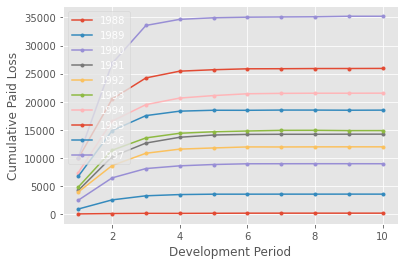

In [27]:
plt.style.use('ggplot')
plt.figure()

#for i in [df.GRNAME.unique()]:
#    df_triangles.loc[i].T.plot(label = i,marker='.')

df_triangles.loc["Public Underwriters Grp"].T.plot(label = 43,marker='.')
plt.ylabel('Cumulative Paid Loss')
plt.xlabel('Development Period')
#set_ylim(0, 150000)
plt.legend()

In [28]:
df_triangles

DevelopmentLag                                     1    2    3    4     5   \
GRNAME                              AccidentYear                             
Adriatic Ins Co                     1988           14   17   17   30    30   
                                    1989            2    3    3    3     3   
                                    1990            0    0    0    0     0   
                                    1991            0    0    0    0     0   
                                    1992            0    0    0    0     0   
...                                               ...  ...  ...  ...   ...   
Yasuda Fire & Marine Ins Co Of Amer 1993          227  497  915  877  1001   
                                    1994          289  659  747  804   817   
                                    1995          284  560  745  804   893   
                                    1996          279  523  735  736   749   
                                    1997          263  429  524  560   560   

DevelopmentLag                                      6     7     8     9     10  
GRNAME                              AccidentYear                                
Adriatic Ins Co                     1988            30    30    30    30    30  
                                    1989             3     3     3     3     3  
                                    1990             0     0     0     0     0  
                                    1991             0     0     0     0     0  
                                    1992             0     0     0     0     0  
...                                                ...   ...   ...   ...   ...  
Yasuda Fire & Marine Ins Co Of Amer 1993          1024  1120  1122  1087  1087  
                                    1994           824   824   824   824   824  
                                    1995           894   897   897   897   897  
                                    1996           783   783   783   783   783  
                                    1997           560   559   559   559   559  

[1460 rows x 10 columns]

In [29]:
auto_triangles = cl.Triangle(df, 
                             index = 'GRNAME',
                             origin="AccidentYear",
                             development="DevelopmentYear",
                             columns=["IncurLoss_B",
                                      "CumPaidLoss_B",
                                      "BulkLoss_B",
                                      "EarnedPremDIR_B",
                                      "EarnedPremCeded_B",
                                      "EarnedPremNet_B"],
                             cumulative=True)

In [30]:
auto_triangles

,Triangle Summary
Valuation:,2006-12
Grain:,OYDY
Shape:,"(146, 6, 19, 19)"
Index:,[GRNAME]
Columns:,"[IncurLoss_B, CumPaidLoss_B, BulkLoss_B, EarnedPremDIR_B, EarnedPremCeded_B, EarnedPremNet_B]"


In [31]:
auto_companies = auto_triangles.index
auto_triangles.index

,GRNAME
0,Adriatic Ins Co
1,Aegis Grp
2,Agency Ins Co Of MD Inc
3,Agway Ins Co
4,All Nation Ins Co
...,...
141,West Bend Mut Ins Grp
142,Wisconsin American Mut Ins Co
143,Wisconsin Mut Ins Co
144,Wolverine Mut Ins Co


In [32]:
auto_triangles.loc["Adriatic Ins Co"]["CumPaidLoss_B"]

,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228
1988,14.00,17.00,17.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,,,,,,,,,
1989,2.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,,,,,,,,,
1990,,,,,,,,,,,,,,,,,,,
1991,,,,,,,,,,,,,,,,,,,
1992,,,,,,,,,,,,,,,,,,,
1993,,,,,,,,,,,,,,,,,,,
1994,,,,,,,,,,,,,,,,,,,
1995,,,,,,,,,,,,,,,,,,,
1996,,,,,,,,,,,,,,,,,,,
1997,,,,,,,,,,,,,,,,,,,


From above information, we could stablish that there are missing some year development information. This is explained by the fact that some companies could not have some information on certain years for auto policies, as the product could be removed or opened on a different timespan than 1988 to 1997.

As our goal is to explore the deveolpment of losses in this specific timespan, we need to limit the data to this dates. In this sense, the next steps take on this and the data is censored up to 1997.

In [33]:
df98 = df[df.DevelopmentYear <= 1997]

In [34]:
df98.DevelopmentYear.unique()

array([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997])

After limiting data, we're studying consistency of losses and their main indicators. For this purpose is useful to use the chainladder (cl) library on python, as it facilitates data triangles trasforming.

In [35]:
auto_triangles = cl.Triangle(df98, 
                             index = 'GRNAME',
                             origin="AccidentYear",
                             development="DevelopmentYear",
                             columns=["IncurLoss_B",
                                      "CumPaidLoss_B",
                                      "BulkLoss_B",
                                      "EarnedPremDIR_B",
                                      "EarnedPremCeded_B",
                                      "EarnedPremNet_B"],
                             cumulative=True)
auto_triangles.describe()

,development,IncurLoss_B,CumPaidLoss_B,BulkLoss_B,EarnedPremDIR_B,EarnedPremCeded_B,EarnedPremNet_B
count,6381.000000,6.215000e+03,6.147000e+03,4.388000e+03,6.357000e+03,5535.000000,6.315000e+03
mean,47.187588,1.014576e+05,7.836593e+04,1.666923e+04,1.241686e+05,5243.702439,1.203984e+05
std,29.230155,8.412121e+05,6.667223e+05,1.781883e+05,1.022347e+06,21265.220756,1.007437e+06
min,12.000000,-1.000000e+00,-5.900000e+01,-7.500000e+02,-1.000000e+01,-2808.000000,-5.100000e+01
25%,24.000000,7.605000e+02,6.140000e+02,1.700000e+01,1.497000e+03,276.000000,9.710000e+02
50%,36.000000,3.290000e+03,2.579000e+03,1.250000e+02,6.282000e+03,899.000000,4.464000e+03
75%,72.000000,1.062700e+04,8.011000e+03,6.640000e+02,1.670500e+04,2914.000000,1.295100e+04
max,120.000000,1.169300e+07,9.640098e+06,3.830524e+06,1.506571e+07,313122.000000,1.492338e+07


In [36]:
auto_triangles

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(146, 6, 10, 10)"
Index:,[GRNAME]
Columns:,"[IncurLoss_B, CumPaidLoss_B, BulkLoss_B, EarnedPremDIR_B, EarnedPremCeded_B, EarnedPremNet_B]"


For this study, we're interested on losses development, so we're going to take this variable from available data.

In [37]:
auto_triangles.loc["All Nation Ins Co"]["CumPaidLoss_B"]

,12,24,36,48,60,72,84,96,108,120
1988,"2,430","4,795","5,870","6,520","6,765","6,853","6,891","6,945","6,949","6,950"
1989,"2,579","4,896","6,024","6,653","6,850","6,885","6,996","7,013","7,014",
1990,"2,824","5,180","6,412","6,872","7,037","7,113","7,134","7,142",,
1991,"2,718","5,216","6,289","6,797","6,912","6,955","6,991",,,
1992,"3,189","6,680","8,288","8,973","9,240","9,350",,,,
1993,"4,365","7,228","8,840","9,677","9,851",,,,,
1994,"3,311","6,588","8,034","8,716",,,,,,
1995,"4,595","8,174","9,345",,,,,,,
1996,"3,448","4,627",,,,,,,,
1997,218,,,,,,,,,


In [38]:
auto_triangles_filt = auto_triangles["IncurLoss_B", "CumPaidLoss_B"]

/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/chainladder/core/pandas.py:364: RuntimeWarning: Mean of empty slice
  obj.values = func(obj.values, axis=axis, *args, **kwargs)


<AxesSubplot:>

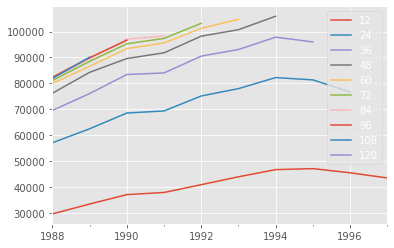

In [70]:
auto_triangles_filt["CumPaidLoss_B"].mean(axis=0).mean(axis=1).plot()

From graph above, we can see that the cummulative losses mean across sample is as expected, increasing with respect to develompent year. 

In [39]:
triangle_link = auto_triangles_filt.link_ratio

/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/chainladder/core/pandas.py:364: RuntimeWarning: Mean of empty slice
  obj.values = func(obj.values, axis=axis, *args, **kwargs)


<AxesSubplot:>

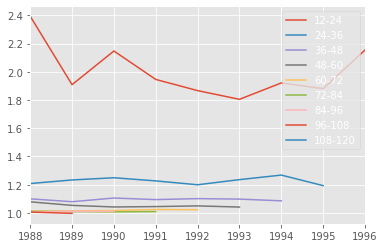

In [69]:
auto_triangles_filt.link_ratio["CumPaidLoss_B"].mean(axis=0).mean(axis=1).plot()

Furthermore, from graph of the mean of link ratio, we can see that there is significant stability on development rates from one year to another, there are some peaks for 12 to 24 months policies, but expected as full development of policies have taken place for the longest term considered and the most policies could have been claimed.

In [75]:
triangle_link["CumPaidLoss_B"].iloc[3].heatmap()

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1988,1.7903,1.2220,1.0944,1.0479,1.0307,1.0056,1.0049,1.0003,1.0000
1989,2.0582,1.1708,1.0554,1.0563,1.0233,1.0011,1.0009,1.0004,
1990,2.2025,1.1739,1.0752,1.0450,1.0439,1.0145,1.0006,,
1991,1.8214,1.2122,1.1054,1.0196,1.0178,1.0095,,,
1992,1.8192,1.2375,1.0983,1.0577,1.0080,,,,
1993,2.0446,1.2109,1.1295,1.0552,,,,,
1994,1.8205,1.2816,1.1203,,,,,,
1995,1.8281,1.1088,,,,,,,
1996,1.8173,,,,,,,,


We can see, for an example, that there is no apparent pattern on link ratios distribution, as is expected.

In [43]:
#triangle_mean_inc = auto_triangles_filt["IncurLoss_B"].mean(0).mean(1)
triangle_mean_paid = auto_triangles_filt["CumPaidLoss_B"].mean(0).mean(1)

/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/chainladder/core/pandas.py:364: RuntimeWarning: Mean of empty slice
  obj.values = func(obj.values, axis=axis, *args, **kwargs)


In [45]:
triangle_mean_paid

,12,24,36,48,60,72,84,96,108,120
1988,"29,739","57,141","69,607","76,251","79,988","81,126","82,003","82,433","81,910","81,981"
1989,"33,554","62,532","76,107","84,283","86,622","88,513","89,477","89,913","90,126",
1990,"37,176","68,608","83,440","89,597","93,434","95,274","97,018","96,652",,
1991,"37,996","69,397","84,047","91,802","95,595","97,359","98,290",,,
1992,"41,005","75,171","90,515","98,216","101,221","103,171",,,,
1993,"44,038","77,998","93,079","100,703","104,699",,,,,
1994,"46,801","82,258","97,827","105,886",,,,,,
1995,"47,180","81,372","95,994",,,,,,,
1996,"45,589","76,751",,,,,,,,
1997,"43,593",,,,,,,,,


In [46]:
triangles_demean = auto_triangles_filt - auto_triangles_filt.mean(0).mean(1)

/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/chainladder/core/pandas.py:364: RuntimeWarning: Mean of empty slice
  obj.values = func(obj.values, axis=axis, *args, **kwargs)


In [47]:
#triangles_sd_inc = auto_triangles_filt["IncurLoss_B"].std(0)
triangles_sd_paid = auto_triangles_filt["CumPaidLoss_B"].std(0)

/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [49]:
(triangles_sd_paid/triangle_mean_paid).heatmap()

,12,24,36,48,60,72,84,96,108,120
1988,8.0406,8.1016,8.0431,8.0299,8.0033,8.0449,8.0458,8.0476,8.0865,8.0875
1989,8.1803,8.2593,8.2165,8.1485,8.2142,8.2102,8.2066,8.2071,8.2078,
1990,8.2429,8.2568,8.2050,8.2491,8.2385,8.2339,8.1950,8.2284,,
1991,8.1209,8.1239,8.0814,8.0538,8.0343,8.0304,8.0278,,,
1992,8.2513,8.1931,8.1634,8.1449,8.1608,8.1533,,,,
1993,8.2972,8.3520,8.3163,8.2949,8.2749,,,,,
1994,8.4848,8.4495,8.3887,8.3725,,,,,,
1995,8.5994,8.5143,8.4833,,,,,,,
1996,8.6393,8.6128,,,,,,,,
1997,8.6975,,,,,,,,,


From an statistic perspective, we have to take care on variation coefficient. We estimated that for the sample on accident and development year, the mean could not be representative of this data, as the variation coefficient (standard deviation over mean) is significantly high. We conclude that, even the data is consistent on an industry level, the sample is sparse. This could be explained by the fact that the sample is very broad and we're taking into account some large and small insurers.

# Zeros treatment

In order to adress on missing data and homogeneity issues, in next steps we're cleaning dataset from companies that are incomplete information and didn't met with timespan requirements.

In [141]:
df_triangles_clean = df98.pivot_table(index=['GRNAME', 'AccidentYear'], columns='DevelopmentLag', values='CumPaidLoss_B', aggfunc='sum').reset_index()

In [142]:
df_triangles_clean.head(40)

DevelopmentLag,GRNAME,AccidentYear,1,2,3,4,5,6,7,8,9,10
0,Adriatic Ins Co,1988,14.0,17.0,17.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
1,Adriatic Ins Co,1989,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN
2,Adriatic Ins Co,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,Adriatic Ins Co,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Adriatic Ins Co,1992,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
5,Adriatic Ins Co,1993,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6,Adriatic Ins Co,1994,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Adriatic Ins Co,1995,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Adriatic Ins Co,1996,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Adriatic Ins Co,1997,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
cleaning_condition1 = df_triangles_clean[df_triangles_clean.iloc[:,-10:].sum(axis=1)==0].reset_index().GRNAME.unique()
df_triangles_clean = df_triangles_clean[~df_triangles_clean["GRNAME"].isin(cleaning_condition1)]

In [144]:
df_triangles_clean = df_triangles_clean.set_index(["GRNAME","AccidentYear"])
df_triangles_clean

DevelopmentLag                                        1       2       3   \
GRNAME                              AccidentYear                           
Agway Ins Co                        1988          3286.0  5883.0  7189.0   
                                    1989          2904.0  5977.0  6998.0   
                                    1990          2519.0  5548.0  6513.0   
                                    1991          2755.0  5018.0  6083.0   
                                    1992          2046.0  3722.0  4606.0   
...                                                  ...     ...     ...   
Yasuda Fire & Marine Ins Co Of Amer 1993           227.0   497.0   915.0   
                                    1994           289.0   659.0   747.0   
                                    1995           284.0   560.0   745.0   
                                    1996           279.0   523.0     NaN   
                                    1997           263.0     NaN     NaN   

DevelopmentLag                                        4       5       6   \
GRNAME                              AccidentYear                           
Agway Ins Co                        1988          7868.0  8245.0  8498.0   
                                    1989          7386.0  7802.0  7984.0   
                                    1990          7003.0  7318.0  7639.0   
                                    1991          6724.0  6856.0  6978.0   
                                    1992          5059.0  5351.0  5394.0   
...                                                  ...     ...     ...   
Yasuda Fire & Marine Ins Co Of Amer 1993           877.0  1001.0     NaN   
                                    1994           804.0     NaN     NaN   
                                    1995             NaN     NaN     NaN   
                                    1996             NaN     NaN     NaN   
                                    1997             NaN     NaN     NaN   

DevelopmentLag                                        7       8       9   \
GRNAME                              AccidentYear                           
Agway Ins Co                        1988          8546.0  8588.0  8591.0   
                                    1989          7993.0  8000.0  8003.0   
                                    1990          7750.0  7755.0     NaN   
                                    1991          7044.0     NaN     NaN   
                                    1992             NaN     NaN     NaN   
...                                                  ...     ...     ...   
Yasuda Fire & Marine Ins Co Of Amer 1993             NaN     NaN     NaN   
                                    1994             NaN     NaN     NaN   
                                    1995             NaN     NaN     NaN   
                                    1996             NaN     NaN     NaN   
                                    1997             NaN     NaN     NaN   

DevelopmentLag                                        10  
GRNAME                              AccidentYear          
Agway Ins Co                        1988          8591.0  
                                    1989             NaN  
                                    1990             NaN  
                                    1991             NaN  
                                    1992             NaN  
...                                                  ...  
Yasuda Fire & Marine Ins Co Of Amer 1993             NaN  
                                    1994             NaN  
                                    1995             NaN  
                                    1996             NaN  
                                    1997             NaN  

[950 rows x 10 columns]

In [145]:
names_clean = df_triangles_clean.reset_index().GRNAME.unique()

In [146]:
temp = df_triangles_clean.reset_index().iloc[: , 2:].to_numpy()

smaller_matrix_size = (10, 10)
smaller_matrices = []

# Iterate through the rows
for i in range(0, temp.shape[0], smaller_matrix_size[0]):
    for j in range(0, temp.shape[1], smaller_matrix_size[1]):
        # Extract a smaller matrix from the larger matrix
        smaller_matrix = temp[i:i+smaller_matrix_size[0], j:j+smaller_matrix_size[1]]
        smaller_matrices.append(smaller_matrix)

In [147]:
# Stack the matrices along a new axis
stacked_matrices = np.stack(smaller_matrices, axis=0)

# Calculate the mean along the new axis
mean = pd.DataFrame(np.mean(stacked_matrices, axis=0), columns = [np.arange(1,11)], index= [np.arange(1988,1998)])
sd = pd.DataFrame(np.std(stacked_matrices, axis=0), columns = [np.arange(1,11)], index= [np.arange(1988,1998)])
cv = sd/mean

<Figure size 432x288 with 0 Axes>

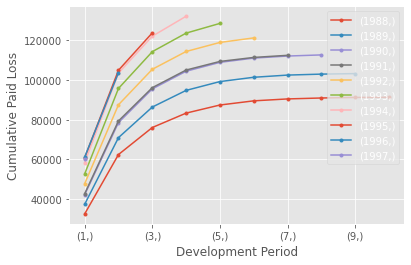

In [148]:
plt.figure()

pd.DataFrame(mean).T.plot(label = "Mean",marker='.')
plt.ylabel('Cumulative Paid Loss')
plt.xlabel('Development Period')
#set_ylim(0, 150000)
plt.legend()

In [149]:
#sum([d for d in smaller_matrices])
def sum_losses_in_triangles(matrices):
    triangle_sums = []
    for matrix in matrices:
        triangle_sums.append(np.nansum(np.triu(matrix)))
    return triangle_sums

# Sum up losses in each triangle
triangle_sums = sum_losses_in_triangles(smaller_matrices)

# Display the results
for i, triangle_sum in enumerate(triangle_sums):
    print(f"Triangle {i+1} Sum: {triangle_sum}")

Triangle 1 Sum: 217753.0
Triangle 2 Sum: 201254.0
Triangle 3 Sum: 9795.0
Triangle 4 Sum: 82247.0
Triangle 5 Sum: 310747.0
Triangle 6 Sum: 28948.0
Triangle 7 Sum: 2415.0
Triangle 8 Sum: 44004.0
Triangle 9 Sum: 182269.0
Triangle 10 Sum: 35397.0
Triangle 11 Sum: 316276.0
Triangle 12 Sum: 14664.0
Triangle 13 Sum: 13538.0
Triangle 14 Sum: 375974.0
Triangle 15 Sum: 367251.0
Triangle 16 Sum: 19527.0
Triangle 17 Sum: 11426.0
Triangle 18 Sum: 163664.0
Triangle 19 Sum: 240510.0
Triangle 20 Sum: 123035.0
Triangle 21 Sum: 1281652.0
Triangle 22 Sum: 90919.0
Triangle 23 Sum: 6811417.0
Triangle 24 Sum: 236309.0
Triangle 25 Sum: 661265.0
Triangle 26 Sum: 377297.0
Triangle 27 Sum: 739036.0
Triangle 28 Sum: 30523.0
Triangle 29 Sum: 270729.0
Triangle 30 Sum: 1832661.0
Triangle 31 Sum: 50381.0
Triangle 32 Sum: 25273.0
Triangle 33 Sum: 120119.0
Triangle 34 Sum: 10808.0
Triangle 35 Sum: 100993.0
Triangle 36 Sum: 99241.0
Triangle 37 Sum: 522032.0
Triangle 38 Sum: 12724.0
Triangle 39 Sum: 249954.0
Triangle 40

/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

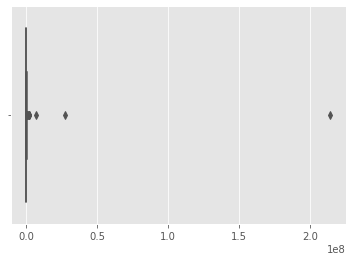

In [150]:
sns.boxplot(triangle_sums)

In [151]:
max_1 = triangle_sums.index(max(triangle_sums))
del triangle_sums[80]
max_2 = triangle_sums.index(max(triangle_sums))
del triangle_sums[85]
max_3 = triangle_sums.index(max(triangle_sums))
del triangle_sums[84]
max_4 = triangle_sums.index(max(triangle_sums))
del triangle_sums[82]
max_5 = triangle_sums.index(max(triangle_sums))
del triangle_sums[22]

/Users/raul/opt/miniconda3/envs/MiEntorno/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

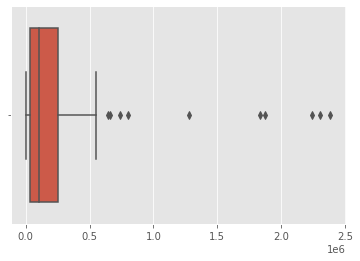

In [152]:
sns.boxplot(triangle_sums)

In [153]:
removals = [80, 86, 85, 83, 22]
names_clean[[removals]]

/var/folders/s1/5zdy54cn7xv66qmfw8ds98yw0000gn/T/ipykernel_14169/462374934.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  names_clean[[removals]]


array(['State Farm Mut Grp', 'United Services Automobile Asn Grp',
       'US Lloyds Ins Co', 'Toa-Re Ins Co Of Amer', 'FL Farm Bureau Grp'],
      dtype=object)

In [154]:
names_clean = [e for e in names_clean if e not in removals]

In [155]:
df_triangles_clean = df_triangles_clean.reset_index().drop(index=removals).set_index(["GRNAME","AccidentYear"])

In [156]:
df_triangles_clean

DevelopmentLag                                        1       2       3   \
GRNAME                              AccidentYear                           
Agway Ins Co                        1988          3286.0  5883.0  7189.0   
                                    1989          2904.0  5977.0  6998.0   
                                    1990          2519.0  5548.0  6513.0   
                                    1991          2755.0  5018.0  6083.0   
                                    1992          2046.0  3722.0  4606.0   
...                                                  ...     ...     ...   
Yasuda Fire & Marine Ins Co Of Amer 1993           227.0   497.0   915.0   
                                    1994           289.0   659.0   747.0   
                                    1995           284.0   560.0   745.0   
                                    1996           279.0   523.0     NaN   
                                    1997           263.0     NaN     NaN   

DevelopmentLag                                        4       5       6   \
GRNAME                              AccidentYear                           
Agway Ins Co                        1988          7868.0  8245.0  8498.0   
                                    1989          7386.0  7802.0  7984.0   
                                    1990          7003.0  7318.0  7639.0   
                                    1991          6724.0  6856.0  6978.0   
                                    1992          5059.0  5351.0  5394.0   
...                                                  ...     ...     ...   
Yasuda Fire & Marine Ins Co Of Amer 1993           877.0  1001.0     NaN   
                                    1994           804.0     NaN     NaN   
                                    1995             NaN     NaN     NaN   
                                    1996             NaN     NaN     NaN   
                                    1997             NaN     NaN     NaN   

DevelopmentLag                                        7       8       9   \
GRNAME                              AccidentYear                           
Agway Ins Co                        1988          8546.0  8588.0  8591.0   
                                    1989          7993.0  8000.0  8003.0   
                                    1990          7750.0  7755.0     NaN   
                                    1991          7044.0     NaN     NaN   
                                    1992             NaN     NaN     NaN   
...                                                  ...     ...     ...   
Yasuda Fire & Marine Ins Co Of Amer 1993             NaN     NaN     NaN   
                                    1994             NaN     NaN     NaN   
                                    1995             NaN     NaN     NaN   
                                    1996             NaN     NaN     NaN   
                                    1997             NaN     NaN     NaN   

DevelopmentLag                                        10  
GRNAME                              AccidentYear          
Agway Ins Co                        1988          8591.0  
                                    1989             NaN  
                                    1990             NaN  
                                    1991             NaN  
                                    1992             NaN  
...                                                  ...  
Yasuda Fire & Marine Ins Co Of Amer 1993             NaN  
                                    1994             NaN  
                                    1995             NaN  
                                    1996             NaN  
                                    1997             NaN  

[945 rows x 10 columns]

From above procedure, we droped the largest companies in order to homogeneize the losses, this allows us to get better estimations on mean based procedures across sample. 